In [1]:

from google.colab import drive

drive.mount('/content/drive', force_remount=True)
%cd ..
%cd content/drive/My Drive



Mounted at /content/drive
/
/content/drive/My Drive


In [2]:
import pandas as pd

train_data=pd.read_csv("data/train.csv")
val_data=pd.read_csv("data/val.csv")
test_data=pd.read_csv("data/test.csv")
train_data.head()

,id,name,text,label
0,21687,"""The Perfect Furlough""",1958 films;American films;Comedy films;English...,3
1,15781,"""Vicky Jenson""",American animators;Living people;Year of birth...,0
2,5205,"""Billy Burke """,1966 births;American film actors;American tele...,0
3,14310,"""Giovonnie Samuels""",1985 births;African American actors;American c...,0
4,21211,"""To Walk with Lions""",1999 films;Canadian films;Kenyan films;English...,3


In [3]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 5.3 MB/s 
     |████████████████████████████████| 596 kB 47.8 MB/s 
     |████████████████████████████████| 895 kB 44.2 MB/s 
     |████████████████████████████████| 3.3 MB 37.6 MB/s 
     |████████████████████████████████| 61 kB 408 kB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
from transformers import TFBertForSequenceClassification,BertTokenizer
import tensorflow as tf
max_length = 32
batch_size = 128
learning_rate = 2e-5
number_of_epochs = 8
num_classes = 4 # 类别数

In [6]:
pip install numpy --upgrade

     |████████████████████████████████| 15.7 MB 5.5 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
def convert_example_to_feature(review):
    return tokenizer.encode_plus(review, 
                                 add_special_tokens = True, 
                                 max_length = max_length, 
                                 pad_to_max_length = True, 
                                 return_attention_mask = True, 
                                )


def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
    return {
      "input_ids": input_ids,
      "token_type_ids": token_type_ids,
      "attention_mask": attention_masks,
  }, label

def encode_examples(ds, limit=-1):
    
    input_ids_list = []
    token_type_ids_list = []
    attention_mask_list = []
    label_list = []
    if (limit > 0):
        ds = ds.take(limit)
    
    for index, row in ds.iterrows():
        
        review = row["text"]
#         print(review)
        label = row["label"]
#         print(label)
        bert_input = convert_example_to_feature(review)
  
        input_ids_list.append(bert_input['input_ids'])
        token_type_ids_list.append(bert_input['token_type_ids'])
        attention_mask_list.append(bert_input['attention_mask'])
        label_list.append([label])
    return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)


In [6]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# train dataset
ds_train_encoded = encode_examples(train_data).shuffle(10000).batch(batch_size)
# val dataset
ds_val_encoded = encode_examples(val_data).batch(batch_size)
# test dataset
# ds_test_encoded = encode_examples(test_data).batch(batch_size)


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2232: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
pip install --upgrade pip

     |████████████████████████████████| 1.7 MB 4.3 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.3.3
    Uninstalling pip-20.3.3:
      Successfully uninstalled pip-20.3.3
Note: you may need to restart the kernel to use updated packages.


In [13]:
from transformers import TFBertForSequenceClassification
import tensorflow as tf

model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=4)


Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
from transformers import TFBertForSequenceClassification
import tensorflow as tf
from transformers import EarlyStoppingCallback

learning_rate = 2e-5

number_of_epochs = 8

model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=4)


optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate,epsilon=1e-08, clipnorm=1)

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# fit model
bert_history = model.fit(ds_train_encoded, epochs=number_of_epochs, validation_data=ds_val_encoded)


Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/8
169/169 [==============================] - 293s 2s/step - loss: 0.2688 - accuracy: 0.9343 - val_loss: 0.0721 - val_accuracy: 0.9808
Epoch 2/8
169/169 [==============================] - 259s 2s/step - loss: 0.0586 - accuracy: 0.9847 - val_loss: 0.0499 - val_accuracy: 0.9858
Epoch 3/8
169/169 [==============================] - 259s 2s/step - loss: 0.0443 - accuracy: 0.9873 - val_loss: 0.0520 - val_accuracy: 0.9854
Epoch 4/8
169/169 [==============================] - 259s 2s/step - loss: 0.0369 - accuracy: 0.9902 - val_loss: 0.0459 - val_accuracy: 0.9867
Epoch 5/8
169/169 [==============================] - 259s 2s/step - loss: 0.0314 - accuracy: 0.9910 - val_loss: 0.0454 - val_accuracy: 0.9879
Epoch 6/8
169/169 [==============================] - 259s 2s/step - loss: 0.0255 - accuracy: 0.9927 - val_loss: 0.0411 - val_accuracy: 0.9887
Epoch 7/8
169/169 [==============================] - 259s 2s/step - loss: 0.0205 - accuracy: 0.9943 - val_loss: 0.0491 - val_accuracy: 0.9883
Epoch 

In [8]:
def map_test_example_to_dict(input_ids, attention_masks, token_type_ids):
    return {
      "input_ids": input_ids,
      "token_type_ids": token_type_ids,
      "attention_mask": attention_masks,
  }
def encode_test_examples(ds, limit=-1):
    input_ids_list = []
    token_type_ids_list = []
    attention_mask_list = []
    label_list = []
    if (limit > 0):
        ds = ds.take(limit)
    
    for index, row in ds.iterrows():
        
        review = row["text"]
#         print(review)
#         print(label)
        bert_input = convert_example_to_feature(review)
        input_ids_list.append(bert_input['input_ids'])
        token_type_ids_list.append(bert_input['token_type_ids'])
        attention_mask_list.append(bert_input['attention_mask'])
    return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list)).map(map_test_example_to_dict)
ds_test_encoded = encode_test_examples(test_data).batch(batch_size)


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2232: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


TFSequenceClassifierOutput([('logits',
                             array([[-2.4306824, -2.8762813, -2.5700808,  7.2109213],
                                    [-2.7707424, -2.6681833, -2.5457785,  7.2243433],
                                    [-2.707415 , -2.6810045, -2.5635464,  7.2190027],
                                    ...,
                                    [ 6.4807177, -1.2703509, -1.795237 , -2.536876 ],
                                    [-2.7648253, -2.678378 , -2.4770885,  7.229936 ],
                                    [-2.7791827,  1.6291902,  3.6969674, -2.5206869]], dtype=float32))])

In [10]:
out=model.predict(ds_test_encoded)

In [14]:
output=out.logits

In [16]:
k=output.shape
k

(10285, 4)

In [20]:
import numpy as np
idx = np.argmax(output, axis=1)
idx.shape

(10285,)

In [21]:
idx

array([3, 3, 3, ..., 0, 3, 2])

In [22]:
example_data=pd.read_csv("data/submit_example.csv")
example_data.head()

,id,label
0,25921,0
1,27512,0
2,26248,0
3,33204,0
4,6997,0


In [23]:
df = pd.DataFrame(idx)
df.to_csv('myfile.csv')

In [1]:
import pandas as pd
edge=pd.read_csv("edges.csv")
edge.head()

,node1,node2
0,0,4221
1,0,4390
2,0,2664
3,0,6885
4,0,989


<class 'pandas.core.frame.DataFrame'>


/Users/wangwenqing/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


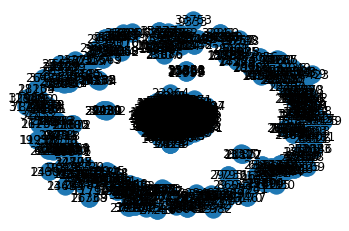

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

print(type(edge))
g = nx.Graph()
for row in edge.itertuples():
    # print(row)
    # print("******")
    # print(getattr(row,'node1'),getattr(row,'node2'))
    # print("---------------")
    g.add_edge(getattr(row,'node1'),getattr(row,'node2'))
    # g.add_edge(i['node1'],i['node2'])
fig, ax = plt.subplots()
nx.draw(g, ax=ax, with_labels=True) # show node label
plt.show()

In [25]:
print(f"Node size: {len(g.nodes())}")
print(f"Edge size: {len(g.edges())}")
print("=="*30)
# number_of_isolates(G): isolated의 수
print(f"== nx.number_of_isolates(g): {nx.number_of_isolates(g)}")
print("--"*30)
print(f"== nx.is_isolate: {nx.is_isolate(g, 0)}")
print("--"*30)

# all isolate generator?
print(f"== nx.isolates: ")
print([isolated_node for isolated_node in nx.isolates(g)][:10])
print("==" * 30)

Node size: 27312
Edge size: 122706
== nx.number_of_isolates(g): 0
------------------------------------------------------------
== nx.is_isolate: False
------------------------------------------------------------
== nx.isolates: 
[]
